**Uwaga**: Zadania należy wykonać  w notatniku Jupyter.

1. Zapoznaj się z teorią algorytmu klastrowania K-means (klasyczny alogorytm w dziedzinie eksploracji danych (ang. <a href="https://en.wikipedia.org/wiki/Data_mining">data mining))</a>) np. przez stronę <a href="https://www.statystyka.eu/analiza-skupien/metoda-k-srednich.php">metoda-k-średnich</a>. Przestestuj jedną wybraną metrykę, inną  niż euklidesowa - wykonaj obrazy pokazujące efekty jej działania.
   
2. Przeczytaj, przeanalizuj i przetestuj materiał na stronie  <a href="https://www.kaggle.com/code/jaidevchittoria/k-means-from-scratch-iris">k-means-from-scratch-iris</a> (**Irysy** stanowią kanoniczny zbiór danych w w różnych zadaniach eksploracji danych i uczenia maszynowego )

   - Powtórz doświadczenie zmieniając metrykę euklidesową na metrykę $L_1$ 
   - Powtórz doświadczenie z metryką euklidesową usuwając z danych jedną klasę.
<p></p>

3. Wykonaj ponownie powyższe doświadczenie, tym razem skupiając się na sposobach wizualizacji danych i wyników. Posłuż
   się materiałem na stronie
   
   https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset
   
    - Przeczytaj dokumentacje wszystkich nowych dla siebie funkcji.
    - W szczególności przeczytaj uwagi o mierzeniu odległości  w użytej tu implementacji algorytmu K-means - punkt 2.3.2 na stronie <a href="https://scikit-learn.org/stable/modules/clustering.html">scikit-learn.org/stable/modules/clustering</a> .
        
Dane pobierz  z adresu <a href="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv">iris.csv</a>

## Zadanie 1

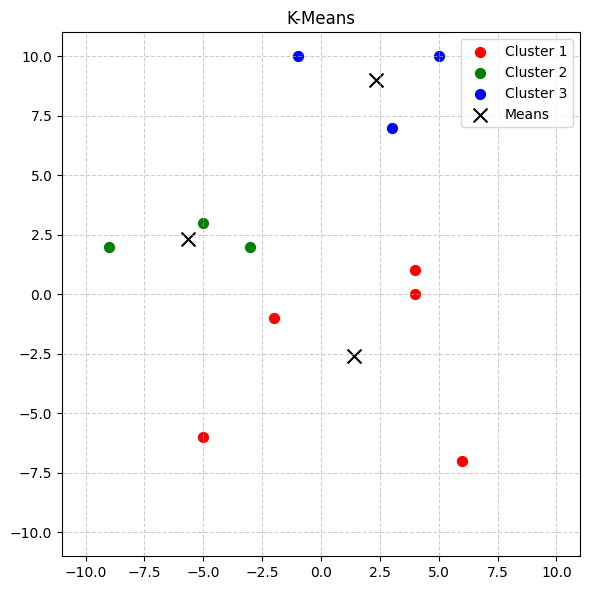

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def norm(a, b): 
  return np.max(np.abs(a - b))  # Norma czebyszewa

def kmeans(points, means_amount=3, iterations=5):
  # Create random means
  min_vals = points.min(axis=0)
  max_vals = points.max(axis=0)
  means = [[-2, -1], [-5, 3], [4, 1]]
  # means = np.random.uniform(min_vals, max_vals, (means_amount, 2))
  
  # Iterate
  for _ in range(iterations):
    # Set points to means
    labels = []
    for p in points:
      distances = [norm(p, m) for m in means]
      labels.append(np.argmin(distances))
    labels = np.array(labels)
    
    # New means
    new_means = []
    for i in range(means_amount):
      cluster_points = points[labels == i]
      if len(cluster_points) > 0:
        new_means.append(cluster_points.mean(axis=0))
      else:
        new_means.append(np.random.uniform(min_vals, max_vals))
    new_means = np.array(new_means)
    
    # check if are close
    if np.allclose(means, new_means):
        break
    means = new_means
  
  return labels, means




points = np.array([
    [-1, 10], [3, 7], [-3, 2], [-2, -1], [4, 0],
    [6, -7], [-5, -6], [-9, 2], [-5, 3], [4, 1], [5, 10]
])

labels, means = kmeans(points, means_amount=3, iterations=10)
colors = ['red', 'green', 'blue']


# print on plot
plt.figure(figsize=(6, 6))

# add points with colors
for i in range(len(means)):
    cluster = points[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], s=50, label=f'Cluster {i+1}')

# add means
plt.scatter(means[:, 0], means[:, 1], color='black', marker='x', s=100, label='Means')

plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('K-Means')
plt.legend()
plt.tight_layout()
plt.show()
